# 2023-02-23

# ANN Regression

In [1]:
# ANN실습에 사용할 보험료 데이터

import pandas as pd
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
insurance.shape

(1338, 7)

## 시각화

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='bmi', ylabel='age'>,
        <AxesSubplot: xlabel='children', ylabel='age'>,
        <AxesSubplot: xlabel='charges', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='bmi'>,
        <AxesSubplot: xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot: xlabel='children', ylabel='bmi'>,
        <AxesSubplot: xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot: xlabel='age', ylabel='children'>,
        <AxesSubplot: xlabel='bmi', ylabel='children'>,
        <AxesSubplot: xlabel='children', ylabel='children'>,
        <AxesSubplot: xlabel='charges', ylabel='children'>],
       [<AxesSubplot: xlabel='age', ylabel='charges'>,
        <AxesSubplot: xlabel='bmi', ylabel='charges'>,
        <AxesSubplot: xlabel='children', ylabel='charges'>,
        <AxesSubplot: xlabel='charges', ylabel='charges'>]], dtype=object)

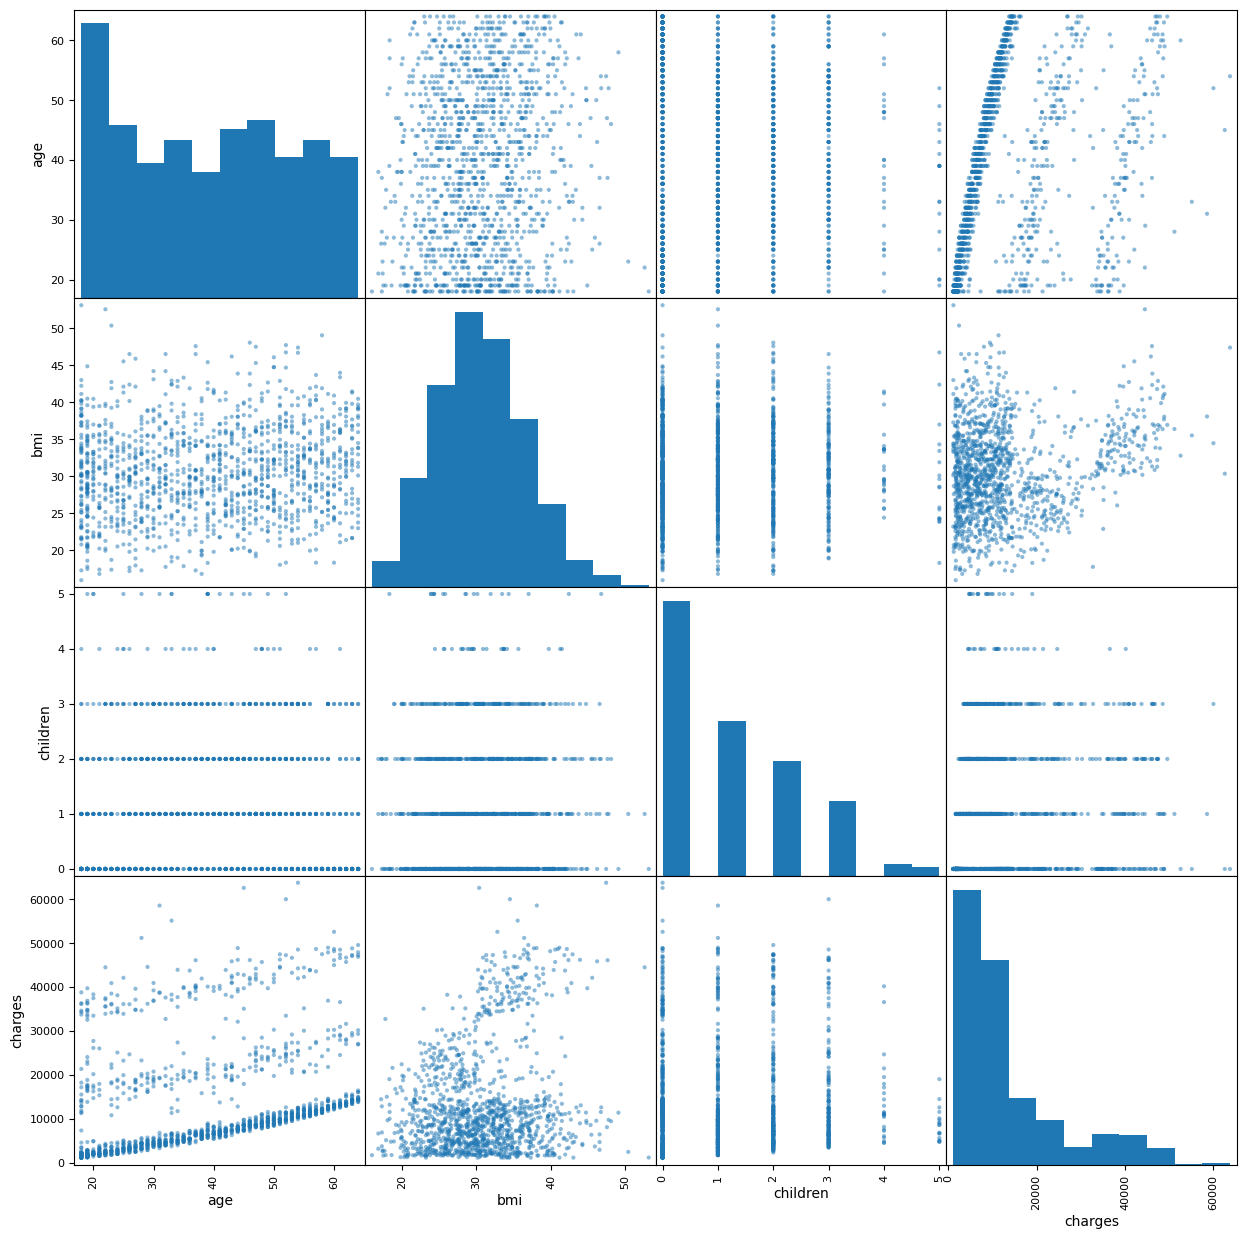

In [3]:
# 각 컬럼 간의 상관관계를 확인할 수 있는 scatter_matrix

pd.plotting.scatter_matrix(insurance, figsize=(15, 15))

In [ ]:
# 데이터 분석 -> insight 도출 했다는 가정 하에 -> 딥러닝 모델 생성

# 보험료와 각 컬럼간의 상관관계
# 보험료 히스토그램
# 성별에 따른 흡연율
# childeren smoker 상관관계
# 흡연여부가 보험료에 미치는 영향

## 데이터 전처리

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# 범주형 data (sex, smoker, region) -> integer 혹은 one hot encoding 데이터로 변환해 줄 필요성이 있음
# 연속형 data (나머지)

In [7]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
# 범주형 데이터를 integer or (on hot encoding)로 변환 (integer)하여 새로운 column 추가

from sklearn.preprocessing import LabelEncoder
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
region_le = LabelEncoder()

insurance['sex_label'] = sex_le.fit_transform(insurance['sex']) 
insurance['smoker_label'] = smoker_le.fit_transform(insurance['smoker']) 
insurance['region_label'] = region_le.fit_transform(insurance['region']) 
insurance

,age,sex,bmi,children,smoker,region,charges,sex_label,smoker_label,region_label
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [16]:
# 역으로 integer에서 범주형으로 바꿔야 할 때

region_le.inverse_transform([0, 1, 2, 3])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

### input / target 분리

In [11]:
# 범주형 데이터를 integer데이터로 바꾸고 새로운 컬럼을 추가했으므로, 필요없는 컬럼은 drop하고 가져온다.

X = insurance.drop(['sex', 'smoker', 'region', 'charges'], axis = 1)
y = insurance['charges'].values.reshape(-1, 1)                 # output은 2차원의 array형태여야 한다. 

### train / test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(1003, 6)
(335, 6)


### scaling  
- train/test split 한 후 scaling하게 되면 딥러닝이 scaling을 학습하기 때문에, scaling하기 전에 train/test split을 해야 한다.
- 나중에 예측할 때, input -> target을 예측해야 함
- input, target이랑 한 번에 scaling을 못한다. -> input, target scaler를 구분해서 활용 필요

In [16]:
# MinMaxScaler로 data scaling하기

from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()           

scaled_X_train = X_scaler.fit_transform(X_train)
scaled_y_train = y_scaler.fit_transform(y_train)
scaled_X_test = X_scaler.transform(X_test)
scaled_y_test = y_scaler.transform(y_test)

print(scaled_X_train.shape)
print(scaled_y_train.shape)
print(scaled_X_test.shape)
print(scaled_y_test.shape)

(1003, 6)
(1003, 1)
(335, 6)
(335, 1)


### Modeling

In [18]:
# tensorflow vs pytorch    -> 딥러닝 대표적인 library
# 현재 추세는 tensorflow > pytorch

!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 111.7 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 79.2 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 54.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 895.7/895.7 kB 59.0 MB/s eta 0:00:00
     ---------------------------------------- 439.2/439.2 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 98.4 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 76.7 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 55.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 177.2/177.2 kB 11.


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from tensorflow.keras.models import Sequential    # layer들이 모인 바탕이 되는 객체
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(25, activation = 'relu', input_dim = 6))   # input -> layer갯수 적용, 활성화함수 지정, column갯수 지정
model.add(Dense(25, activation = 'relu')) 

model.add(Dense(1, activation = 'linear'))                  # 지도학습-회귀의 output -> 결과는 1, 활성화함수 = 'linear'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                175       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 생성된 model을 시각화

plot_model(model, 'ANN regression.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
# compile단계 : optimizer 지정, loss파라미터 지정 등

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [24]:
# 학습단계 / fitting해줄 때 변수에 저장을 해야함 - 학습되며 기록하기 때문

history = model.fit(scaled_X_train, scaled_y_train, epochs = 100, batch_size = 24, verbose = 1, validation_split=0.2)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.0321 - mae: 0.1295 - val_loss: 0.0219 - val_mae: 0.1112
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0134 - mae: 0.0821 - val_loss: 0.0128 - val_mae: 0.0768
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0102 - mae: 0.0674 - val_loss: 0.0120 - val_mae: 0.0705
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0094 - mae: 0.0635 - val_loss: 0.0118 - val_mae: 0.0759
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0091 - mae: 0.0657 - val_loss: 0.0110 - val_mae: 0.0625
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0586 - val_loss: 0.0105 - val_mae: 0.0686
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0081 - mae: 0.0603 - val_loss: 0.0102 - val_mae: 0.0683
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0076 - m

### 모델평가(evaluate)

In [25]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

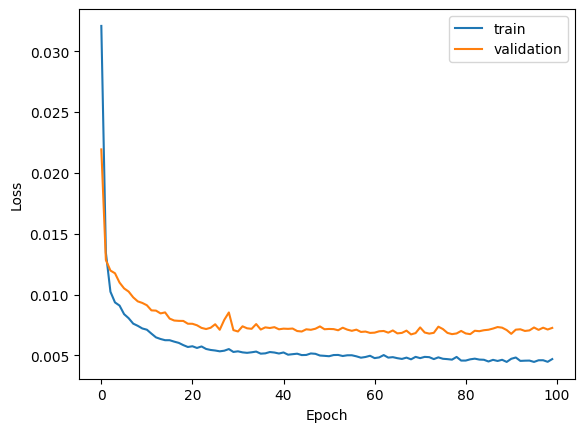

In [27]:
# 학습한 model을 epoch가 증가함에 따라 loss의 변화를 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### 예측하기(predict)

In [30]:
# 샘플 데이터를 scaling하기

sample_data = [[19, 27.8, 0, 0, 1, 3]]            # input ( X의 한 row)
scaled_sample_data = X_scaler.transform(sample_data)

C:\Users\GM220808\.venv\Practice1\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [35]:
# 원본 데이터와 비교하려면 예측값은 scaled된 값이기 때문에, 백스케일 해야한다.

scaled_result = model.predict(scaled_sample_data)
scaled_result

1/1 [==============================] - 0s 21ms/step


array([[0.29255712]], dtype=float32)

In [37]:
# scaled_result를 백스케일

result = y_scaler.inverse_transform(scaled_result)
result

array([[19450.154]], dtype=float32)

# Computer Vision